# Quantization:
## Part1: Data Types and Sizes

In this part, you will learn about the common data types used to store the parameters of machine learning models.

If you're running this notebook on your own machine, you can install the following:

```Python
!pip install torch==2.1.1
```

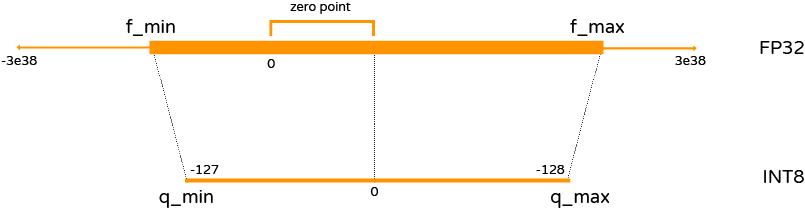

In [1]:
import torch

### Integers

In [2]:
# Information of `8-bit unsigned integer`
torch.iinfo(torch.uint8)

iinfo(min=0, max=255, dtype=uint8)

In [3]:
# Information of `8-bit (signed) integer`
torch.iinfo(torch.int8)

iinfo(min=-128, max=127, dtype=int8)

In [4]:
### Information of `64-bit (signed) integer`
torch.iinfo(torch.int64)

iinfo(min=-9.22337e+18, max=9.22337e+18, dtype=int64)

In [5]:
### Information of `32-bit (signed) integer`
torch.iinfo(torch.int32)

iinfo(min=-2.14748e+09, max=2.14748e+09, dtype=int32)

In [6]:
### Information of `16-bit (signed) integer`
torch.iinfo(torch.int16)

iinfo(min=-32768, max=32767, dtype=int16)

### Floating Points 

In [17]:
# by default, python stores float data in fp64
value = 1/3

In [18]:
format(value, '.60f')

'0.333333333333333314829616256247390992939472198486328125000000'

In [9]:
# 64-bit floating point
tensor_fp64 = torch.tensor(value, dtype = torch.float64)

In [10]:
print(f"fp64 tensor: {format(tensor_fp64.item(), '.60f')}")

fp64 tensor: 0.333333333333333314829616256247390992939472198486328125000000


In [11]:
tensor_fp32 = torch.tensor(value, dtype = torch.float32)
tensor_fp16 = torch.tensor(value, dtype = torch.float16)
tensor_bf16 = torch.tensor(value, dtype = torch.bfloat16)

In [12]:
print(f"fp64 tensor: {format(tensor_fp64.item(), '.60f')}")
print(f"fp32 tensor: {format(tensor_fp32.item(), '.60f')}")
print(f"fp16 tensor: {format(tensor_fp16.item(), '.60f')}")
print(f"bf16 tensor: {format(tensor_bf16.item(), '.60f')}")

fp64 tensor: 0.333333333333333314829616256247390992939472198486328125000000
fp32 tensor: 0.333333343267440795898437500000000000000000000000000000000000
fp16 tensor: 0.333251953125000000000000000000000000000000000000000000000000
bf16 tensor: 0.333984375000000000000000000000000000000000000000000000000000


In [13]:
# Information of `16-bit brain floating point`
torch.finfo(torch.bfloat16)

finfo(resolution=0.01, min=-3.38953e+38, max=3.38953e+38, eps=0.0078125, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=bfloat16)

In [14]:
# Information of `32-bit floating point`
torch.finfo(torch.float32)

finfo(resolution=1e-06, min=-3.40282e+38, max=3.40282e+38, eps=1.19209e-07, smallest_normal=1.17549e-38, tiny=1.17549e-38, dtype=float32)

In [15]:
### Information of `16-bit floating point`
torch.finfo(torch.float16)

finfo(resolution=0.001, min=-65504, max=65504, eps=0.000976562, smallest_normal=6.10352e-05, tiny=6.10352e-05, dtype=float16)

In [16]:
### Information of `64-bit floating point`
torch.finfo(torch.float64)

finfo(resolution=1e-15, min=-1.79769e+308, max=1.79769e+308, eps=2.22045e-16, smallest_normal=2.22507e-308, tiny=2.22507e-308, dtype=float64)

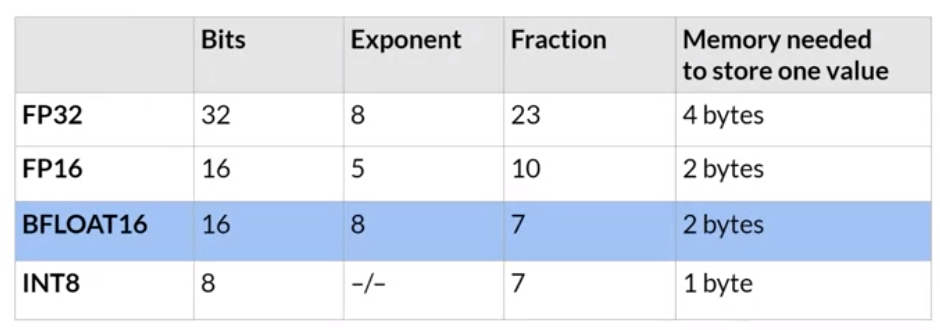

### Downcasting
- A higher datatype like float is converted to a lower dtype like Integer,
- Results in loss of data


let's see the result of it in a matrix

In [30]:
# random pytorch tensor: float32, size=1000
tensor_fp32 = torch.rand(1000, dtype = torch.float32)

**Note:** As it is random, the values you get will be different from the video.

In [31]:
# first 5 elements of the random tensor
tensor_fp32[:5]

tensor([0.2188, 0.8892, 0.4986, 0.5390, 0.6286])

In [32]:
# downcast the tensor to bfloat16 using the "to" method
tensor_fp32_to_bf16 = tensor_fp32.to(dtype = torch.bfloat16)

In [33]:
tensor_fp32_to_bf16[:5]

tensor([0.2188, 0.8906, 0.4980, 0.5391, 0.6289], dtype=torch.bfloat16)

#### takeout:
the values are not the same but very close!

#### Let's see the impact of downcasting in Matrix Multipication

In [34]:
# tensor_fp32 x tensor_fp32
m_float32 = torch.dot(tensor_fp32, tensor_fp32)

In [39]:
m_float32
#m_float32.dtype


tensor(333.4022)

In [36]:
# tensor_fp32_to_bf16 x tensor_fp32_to_bf16
m_bfloat16 = torch.dot(tensor_fp32_to_bf16, tensor_fp32_to_bf16)

In [37]:
m_bfloat16

tensor(334., dtype=torch.bfloat16)

### Benefits:
- Reduced memory consumption
- Enable larger batches
- Increase compute and speed (compute using low precision fp16, bf16 is faster than fp32 since it requires less memory)

### 🥲 Cons:
- Less accurate tho!!!! (less precision!!)